In [26]:
%%capture
!pip install pulp
!pip install matplotlib

In [27]:
from pulp import *
import matplotlib.pyplot as plt

### Dados de entrada

In [28]:
perfis = [
	{
		"nome": "Aposentados",
		"propostas_recebidas": 2000,
		"taxa_inadimplencia": 0.04,
		"taxa_juros": 0.015
	},
	{
		"nome": "Pensionistas",
		"propostas_recebidas": 1242,
		"taxa_inadimplencia": 0.11,
		"taxa_juros": 0.02
	},
	{
		"nome": "PJ",
		"propostas_recebidas": 3982,
		"taxa_inadimplencia": 0.06,
		"taxa_juros": 0.03
	},
	{
		"nome": "CLT",
		"propostas_recebidas": 218,
		"taxa_inadimplencia": 0.08,
		"taxa_juros": 0.025
	},
	{
		"nome": "Funcionários internos",
		"propostas_recebidas": 1802,
		"taxa_inadimplencia": 0.00,
		"taxa_juros": 0.01
	}
]

max_clientes = 5000

### Definição das variáveis

In [29]:
problema = LpProblem('Maximizar_Lucro', LpMaximize)

variaveis = LpVariable.dicts('Propostas', [perfil['nome'] for perfil in perfis], lowBound=0)

### Aplicação do cálculo sobre as características de cada perfil

In [30]:
problema += lpSum(
    (1 - perfil['taxa_inadimplencia']) * perfil['taxa_juros'] * variaveis[perfil['nome']]
    for perfil in perfis
)

problema += lpSum(variaveis) <= max_clientes

for perfil in perfis:
    problema += variaveis[perfil['nome']] <= perfil['propostas_recebidas']

In [31]:
problema.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/consultor/.local/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/cbde615eae34473ea2a4d92da23b62b6-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/cbde615eae34473ea2a4d92da23b62b6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 27 RHS
At line 34 BOUNDS
At line 35 ENDATA
Problem MODEL has 6 rows, 5 columns and 10 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (-5) rows, 5 (0) columns and 5 (-5) elements
0  Obj -0 Dual inf 0.093395 (5)
1  Obj 131.5464
Optimal - objective value 131.5464
After Postsolve, objective 131.5464, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 131.5464 - 1 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds)

1

### Visualização dos resultados

In [32]:
for perfil in perfis:
    print(f"{perfil['nome']} = {variaveis[perfil['nome']].varValue}")

Aposentados = 0.0
Pensionistas = 800.0
PJ = 3982.0
CLT = 218.0
Funcionários internos = 0.0


### Visualização gráfica

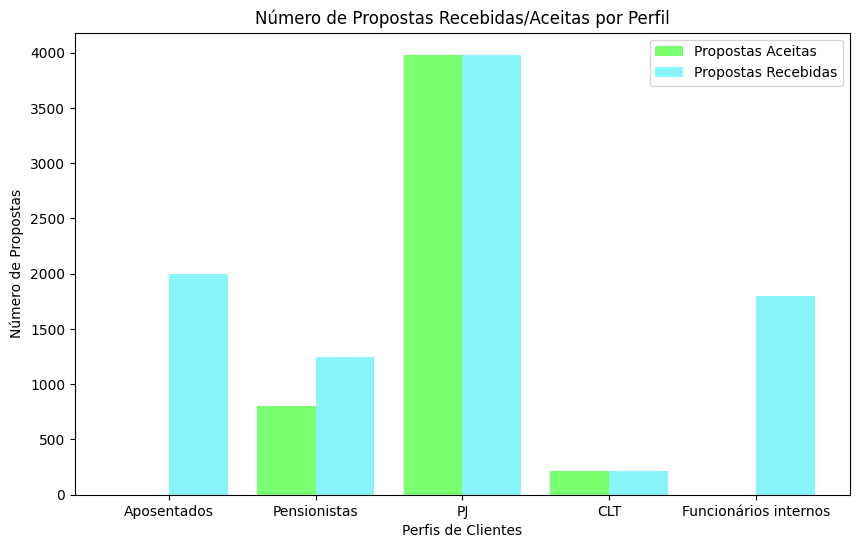

In [33]:
nomes_perfis = [perfil['nome'] for perfil in perfis]
propostas_aceitas = [variaveis[perfil['nome']].varValue for perfil in perfis]
propostas_recebidas = [perfil['propostas_recebidas'] for perfil in perfis]

plt.figure(figsize=(10, 6))
barWidth = 0.4
r1 = range(len(nomes_perfis))
r2 = [x + barWidth for x in r1]

plt.bar(r1, propostas_aceitas, color='#7aff70', width=barWidth, label='Propostas Aceitas')
plt.bar(r2, propostas_recebidas, color='#88f4fc', width=barWidth, label='Propostas Recebidas')

plt.xlabel('Perfis de Clientes')
plt.ylabel('Número de Propostas')
plt.xticks([r + barWidth/2 for r in range(len(nomes_perfis))], nomes_perfis)
plt.title('Número de Propostas Recebidas/Aceitas por Perfil')
plt.legend()
plt.show()